# [Clone Project - Data Science Notes 4 : Machine Learning(ML)](https://www.kaggle.com/mrhippo/data-science-notes-4-machine-learning-ml)

## Introduction
- this kernel is note that I took for **Machine Learning**. This is not a tutorial you can think that kernel as a cheatsheet for Machine Learning. While coding a kernel open this in a new tab and copy paste.

**This kernel is a part of a big series:**
- Data Science Notes1: Matplotlib
- Data Science Notes2: Seaborn
- Data Science Notes3: Plotly
- **Data Science Notes4: Machine Learning(ML)**
- Data Science Notes5: Deep Learning: ANN
- Data Science Notes6: Deep Learning: CNN
- Data Science Notes7: Deep Learning: RNN and LSTM

This kernel will be updated

## Content
- Imports and Datasets
- Regression
- Classification
- Conclusion

## Step 1. Imports and Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
%matplotlib inline

In [5]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01


In [6]:
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [7]:
data = pd.read_csv('./data/StudentsPerformance.csv')

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

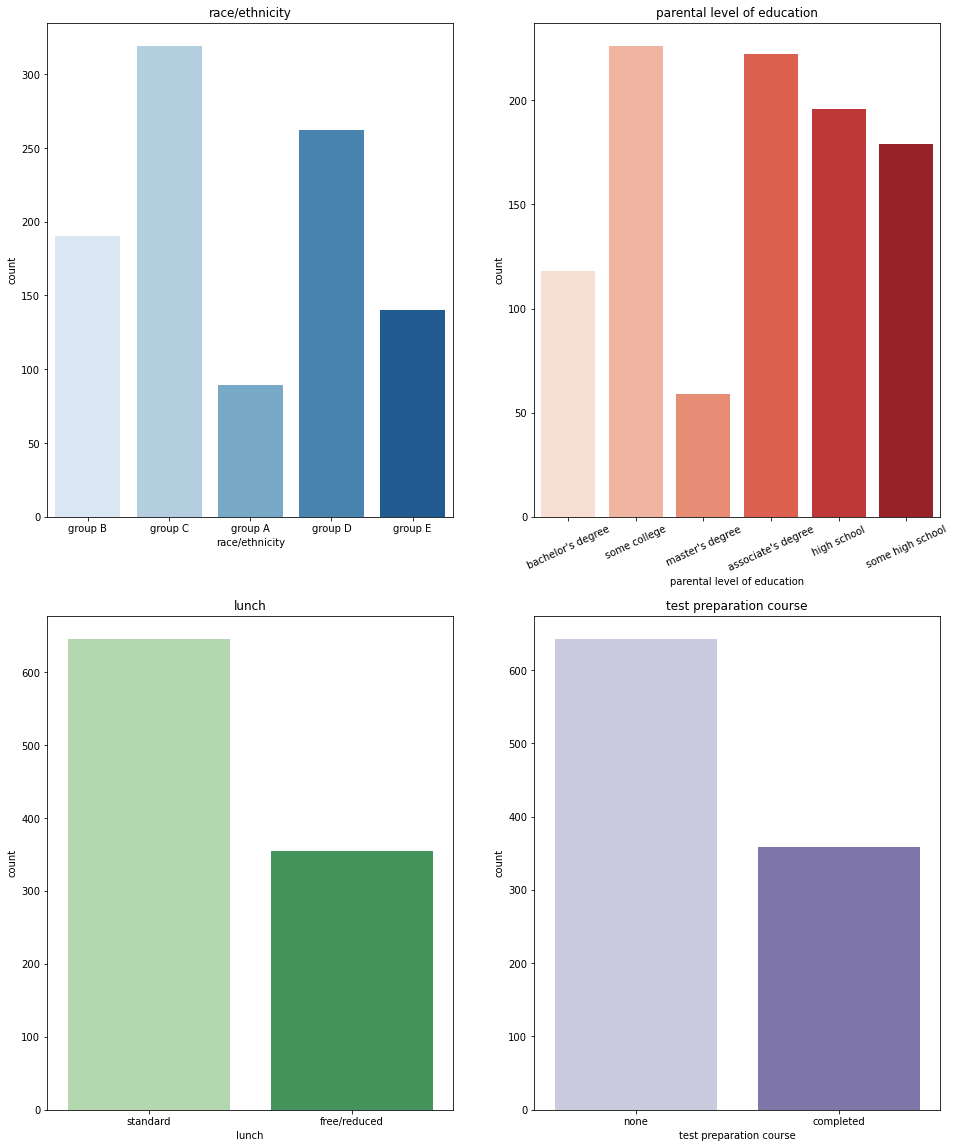

In [12]:
fig, ax = plt.subplots(2,2, figsize=(16,20))

sns.countplot(data['race/ethnicity'], palette = 'Blues', ax=ax[0,0])
ax[0,0].set_title('race/ethnicity')

sns.countplot(data["parental level of education"], palette = 'Reds', ax=ax[0,1])
ax[0,1].set_title('parental level of education')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=25)

sns.countplot(data['lunch'], palette='Greens', ax=ax[1,0])
ax[1,0].set_title('lunch')

sns.countplot(data["test preparation course"], palette='Purples',ax=ax[1,1])
ax[1,1].set_title('test preparation course')

plt.show()

## Step 2. Regression

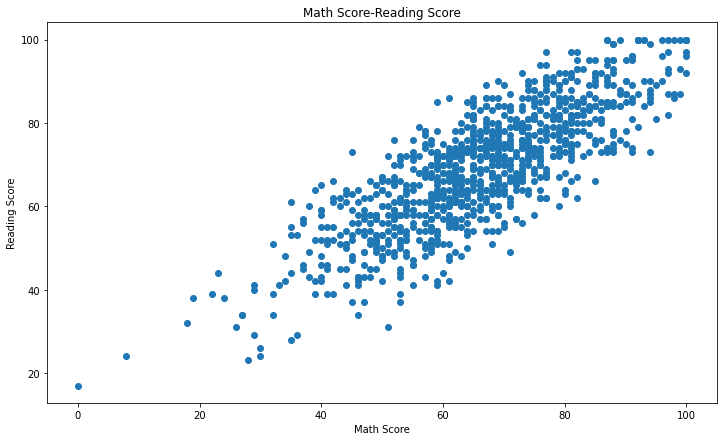

In [13]:
#plt.style.use('default')

x = np.array(data.loc[:,'math score']).reshape(-1,1)
y = np.array(data.loc[:,'reading score']).reshape(-1,1)

fig = plt.figure(figsize=(12,7))
plt.scatter(x=x, y=y)
plt.title('Math Score-Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

### 2-a. Linear Regression
- In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [16]:
print(min(x), max(x))

[0] [100]


In [18]:
np.linspace(min(x), max(x))

array([[  0.        ],
       [  2.04081633],
       [  4.08163265],
       [  6.12244898],
       [  8.16326531],
       [ 10.20408163],
       [ 12.24489796],
       [ 14.28571429],
       [ 16.32653061],
       [ 18.36734694],
       [ 20.40816327],
       [ 22.44897959],
       [ 24.48979592],
       [ 26.53061224],
       [ 28.57142857],
       [ 30.6122449 ],
       [ 32.65306122],
       [ 34.69387755],
       [ 36.73469388],
       [ 38.7755102 ],
       [ 40.81632653],
       [ 42.85714286],
       [ 44.89795918],
       [ 46.93877551],
       [ 48.97959184],
       [ 51.02040816],
       [ 53.06122449],
       [ 55.10204082],
       [ 57.14285714],
       [ 59.18367347],
       [ 61.2244898 ],
       [ 63.26530612],
       [ 65.30612245],
       [ 67.34693878],
       [ 69.3877551 ],
       [ 71.42857143],
       [ 73.46938776],
       [ 75.51020408],
       [ 77.55102041],
       [ 79.59183673],
       [ 81.63265306],
       [ 83.67346939],
       [ 85.71428571],
       [ 87

In [19]:
np.linspace(min(x), max(x)).reshape(-1,1)

array([[  0.        ],
       [  2.04081633],
       [  4.08163265],
       [  6.12244898],
       [  8.16326531],
       [ 10.20408163],
       [ 12.24489796],
       [ 14.28571429],
       [ 16.32653061],
       [ 18.36734694],
       [ 20.40816327],
       [ 22.44897959],
       [ 24.48979592],
       [ 26.53061224],
       [ 28.57142857],
       [ 30.6122449 ],
       [ 32.65306122],
       [ 34.69387755],
       [ 36.73469388],
       [ 38.7755102 ],
       [ 40.81632653],
       [ 42.85714286],
       [ 44.89795918],
       [ 46.93877551],
       [ 48.97959184],
       [ 51.02040816],
       [ 53.06122449],
       [ 55.10204082],
       [ 57.14285714],
       [ 59.18367347],
       [ 61.2244898 ],
       [ 63.26530612],
       [ 65.30612245],
       [ 67.34693878],
       [ 69.3877551 ],
       [ 71.42857143],
       [ 73.46938776],
       [ 75.51020408],
       [ 77.55102041],
       [ 79.59183673],
       [ 81.63265306],
       [ 83.67346939],
       [ 85.71428571],
       [ 87

R^2 score:  0.6684365064501091


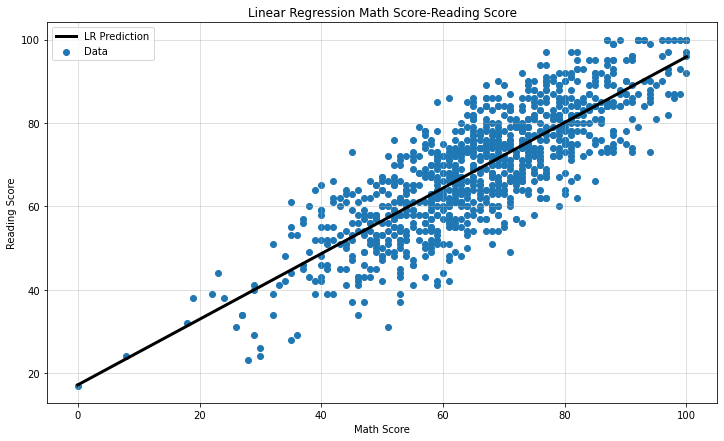

In [20]:
# Predict Space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)

# Fit
reg.fit(x,y)

# Predict
predicted = reg.predict(predict_space)

# R^2
print('R^2 score: ',reg.score(x,y))

# Plot regression line and scatter

fig = plt.figure(figsize=(12,7))
plt.plot(predict_space, predicted, color='black', linewidth=3, label='LR Prediction')
plt.scatter(x=x, y=y, label='Data')
plt.legend()
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True, alpha = 0.5)
plt.title('Linear Regression Math Score-Reading Score')
plt.show()

### 2-b. Decision Tree Regressor
- Decision tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.
- Decision trees where the target variable can take continous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

R^2 score  0.6938905352709723


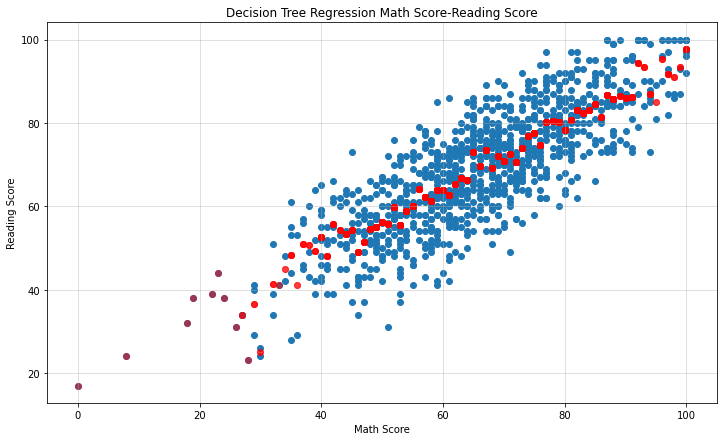

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

y_head = tree_reg.predict(x)

print('R^2 score ',tree_reg.score(x,y))

fig = plt.figure(figsize=(12,7))
plt.scatter(x,y, label='Data')
plt.scatter(x,y_head,color='red', alpha=0.5, label='DT Prediction')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True, alpha=0.5)
plt.title('Decision Tree Regression Math Score-Reading Score')
plt.show()

### 2-c. Random Forest Regressor
- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 
- Random decision forests correct for decision tree's habit of overfitting to their training set.

R^2 score:  0.6928775475170115


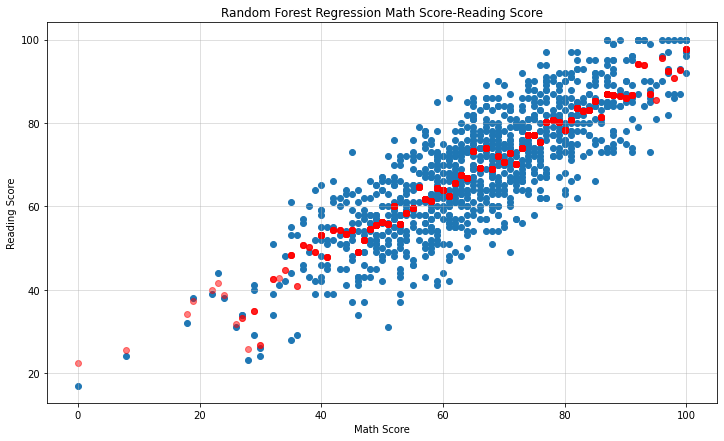

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=30)
rf.fit(x,y)

y_head = rf.predict(x)

print('R^2 score: ',rf.score(x,y))

fig = plt.figure(figsize=(12,7))
plt.scatter(x,y)
plt.scatter(x,y_head,color='red',alpha=0.5)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True, alpha=0.5)
plt.title('Random Forest Regression Math Score-Reading Score')
plt.show()

## Step 3. Classification

### 3-a. Preparing Data

In [23]:
data['gender'] = [1 if each == 'female' else 0 for each in data['gender']]
# female = 1, male = 0
gender_data = data['gender']
data_without_gender = data.drop(['gender'], axis=1)
data_without_gender.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,standard,none,72,72,74
1,group C,some college,standard,completed,69,90,88
2,group B,master's degree,standard,none,90,95,93
3,group A,associate's degree,free/reduced,none,47,57,44
4,group C,some college,standard,none,76,78,75


### 3-b. One-hot Encoding
- **One-Hot Encoding** is a technique for using **categorical data** in ML.

In [24]:
data_without_gender = pd.get_dummies(data_without_gender)
data_without_gender.head()

,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


### 3-c. Logistic Regression
- Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model ( a form of binary regression).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

score_list_lr = []
train_list = []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(data_without_gender, gender_data, test_size=i/10, random_state=42)
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    print('Test accuracy: {}/Test Size: {}'.format(lr.score(X_test, y_test),i))
    score_list_lr.append(lr.score(X_test, y_test))
    train_list.append(lr.score(X_train, y_train))

Test accuracy: 0.89/Test Size: 1
Test accuracy: 0.91/Test Size: 2
Test accuracy: 0.8966666666666666/Test Size: 3
Test accuracy: 0.8975/Test Size: 4
Test accuracy: 0.906/Test Size: 5
Test accuracy: 0.9/Test Size: 6
Test accuracy: 0.8885714285714286/Test Size: 7
Test accuracy: 0.895/Test Size: 8
Test accuracy: 0.88/Test Size: 9


In [27]:
score_list_lr

[0.89,
 0.91,
 0.8966666666666666,
 0.8975,
 0.906,
 0.9,
 0.8885714285714286,
 0.895,
 0.88]

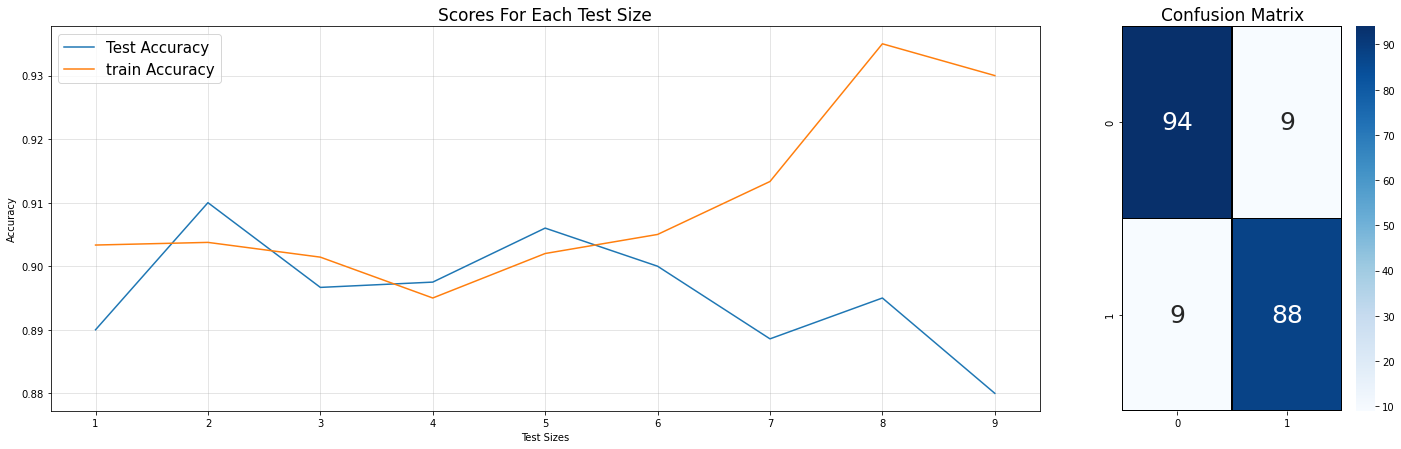

Best Accuracy(test) : 0.91/Test Size: 2


In [30]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(1,10), score_list_lr, label = 'Test Accuracy')
ax1.plot(range(1,10), train_list, label='train Accuracy')
ax1.legend(fontsize = 15)
ax1.set_xlabel('Test Sizes')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores For Each Test Size', fontsize=17)
ax1.grid(True, alpha=0.4)

X_train, X_test, y_train, y_test = train_test_split(data_without_gender, gender_data, test_size=(1+score_list_lr.index(np.max(score_list_lr)))/10, random_state=42)

lr_best = LogisticRegression(random_state=42)
lr_best = lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws = {'size':25}, linewidths=0.5, fmt='.0f', ax=ax2, cmap='Blues',linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy(test) : {}/Test Size: {}'.format(np.max(score_list_lr), 1+score_list_lr.index(np.max(score_list_lr))))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_without_gender, gender_data,test_size = 0.2, random_state = 42)

### 3-d. KNN
- In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametic method proposed by Thomas Cover used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depend on whether k-NN is used for classification or regression:
- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is positive integer, thypically small). if k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=15)
#knn.fit(X_train, y_train)
#print('score: ',knn.score(X_test, y_test))

score_list_knn = []
train_list = []
for each in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train, y_train)
    print('Test accuracy : {}/Neighbors: {}'.format(knn.score(X_test, y_test),each))
    score_list_knn.append(knn.score(X_test, y_test))
    train_list.append(knn.score(X_train, y_train))


Test accuracy : 0.805/Neighbors: 1
Test accuracy : 0.835/Neighbors: 2
Test accuracy : 0.87/Neighbors: 3
Test accuracy : 0.88/Neighbors: 4
Test accuracy : 0.9/Neighbors: 5
Test accuracy : 0.885/Neighbors: 6
Test accuracy : 0.9/Neighbors: 7
Test accuracy : 0.91/Neighbors: 8
Test accuracy : 0.89/Neighbors: 9
Test accuracy : 0.895/Neighbors: 10
Test accuracy : 0.895/Neighbors: 11
Test accuracy : 0.9/Neighbors: 12
Test accuracy : 0.89/Neighbors: 13
Test accuracy : 0.905/Neighbors: 14
Test accuracy : 0.905/Neighbors: 15
Test accuracy : 0.9/Neighbors: 16
Test accuracy : 0.88/Neighbors: 17
Test accuracy : 0.91/Neighbors: 18
Test accuracy : 0.9/Neighbors: 19
Test accuracy : 0.905/Neighbors: 20
Test accuracy : 0.895/Neighbors: 21
Test accuracy : 0.91/Neighbors: 22
Test accuracy : 0.9/Neighbors: 23
Test accuracy : 0.905/Neighbors: 24


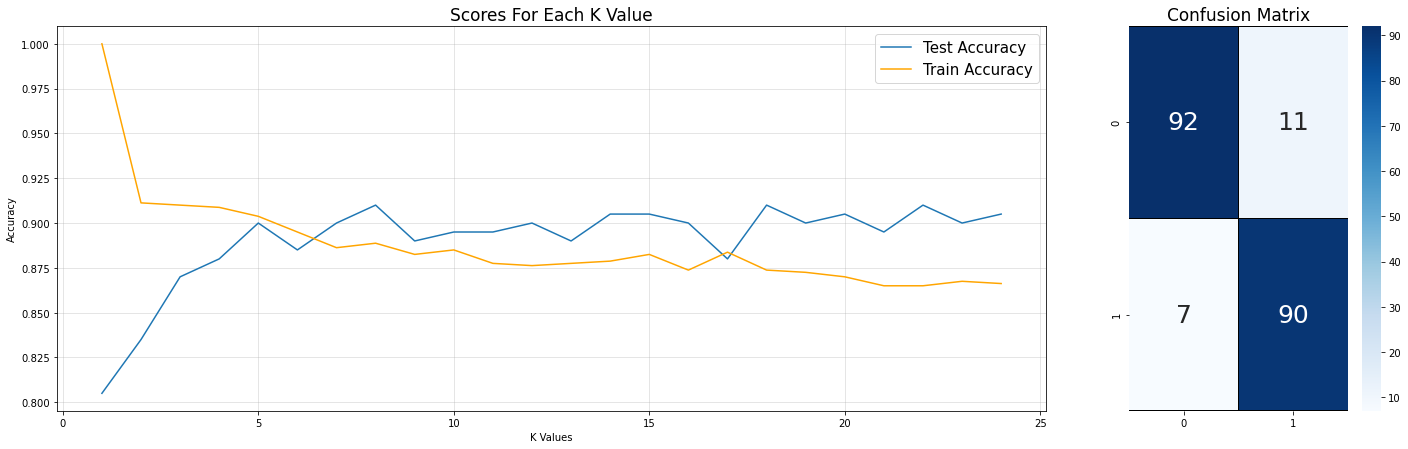

Best Accuracy(test): 0.91/Neighbors: 8


In [34]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(1,25), score_list_knn, label = 'Test Accuracy')
ax1.plot(range(1,25), train_list, c='orange', label='Train Accuracy')
ax1.legend(fontsize=15)
ax1.set_xlabel('K Values')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores For Each K Value', fontsize=17)
ax1.grid(True, alpha=0.4)

knn_best = KNeighborsClassifier(n_neighbors = 1 + score_list_knn.index(np.max(score_list_knn)))
knn_best = knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws = {'size':25}, linewidths=0.5, fmt='.0f', ax=ax2, cmap='Blues', linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy(test): {}/Neighbors: {}'.format(np.max(score_list_knn), 1+score_list_knn.index(np.max(score_list_knn))))

### 3-e. SVM
- In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 
- The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems.
- Developed at AT&T Bell Laboratories by Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997), It presents one of the most robust prediction methods, based on the statistical learning framework or VC theory proposed by Vapnik and Chervonekis (1974) and Vapnik (1982, 1995).

In [35]:
from sklearn.svm import SVC
#svm = SVC()
#svm.fit(X_train, y_train)

#print('accuracy: ',svm.score(X_test, y_test))

score_list_svm = []
train_list = []
for each in range(100, 500, 50):
    svm = SVC(cache_size = each)
    svm.fit(X_train, y_train)
    print('test accuracy: {}/Cache Size: {}'.format(svm.score(X_test, y_test), each))
    score_list_svm.append(svm.score(X_test, y_test))
    train_list.append(svm.score(X_train, y_train))
    

test accuracy: 0.895/Cache Size: 100
test accuracy: 0.895/Cache Size: 150
test accuracy: 0.895/Cache Size: 200
test accuracy: 0.895/Cache Size: 250
test accuracy: 0.895/Cache Size: 300
test accuracy: 0.895/Cache Size: 350
test accuracy: 0.895/Cache Size: 400
test accuracy: 0.895/Cache Size: 450


In [36]:
score_list_svm

[0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 0.895]

In [37]:
np.max(score_list_svm)

0.895

In [39]:
score_list_svm.index(np.max(score_list_svm))

0

In [40]:
50*(1 + score_list_svm.index(np.max(score_list_svm)))

50

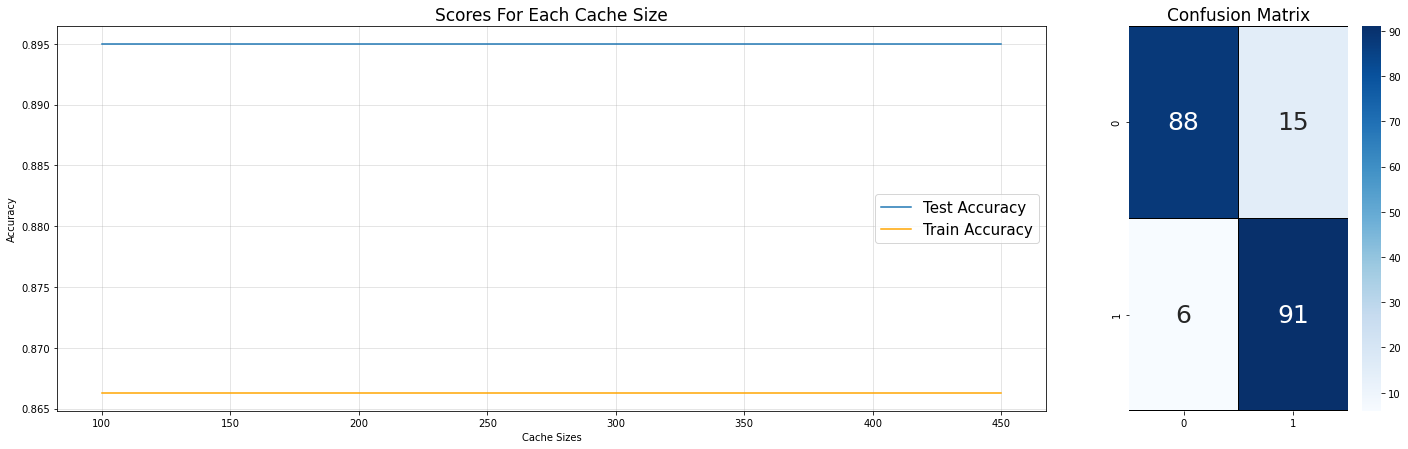

Best Accuracy(Test): 0.895/Cache Size: 100


In [43]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(100,500,50), score_list_svm, label='Test Accuracy')
ax1.plot(range(100,500,50), train_list, c='orange', label='Train Accuracy')
ax1.legend(fontsize=15)
ax1.set_xlabel('Cache Sizes')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores For Each Cache Size', fontsize=17)
ax1.grid(True, alpha=0.4)

svm_best = SVC(cache_size=50 + 50*(1+score_list_svm.index(np.max(score_list_svm))))
svm_best = svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws = {'size':25}, linewidths=0.5, fmt='.0f', ax=ax2, cmap='Blues', linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy(Test): {}/Cache Size: {}'.format(np.max(score_list_svm), 50+50*(1+score_list_svm.index(np.max(score_list_svm)))))

### 3-f. GaussianNB
- In statistics, Naive Bayes classifiers are a family of simple 'probabilistic classifiers' based on applying Bayes' theorem with strong (naive) independence assumptions between the features. They are among the simplest Bayesian network models. But they could be coupled with Kernel density estimation and achive higher accuracy levels.
- Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training than by expensive iterative approximation as used for many other types of classifiers

Test Accuracy:  0.615


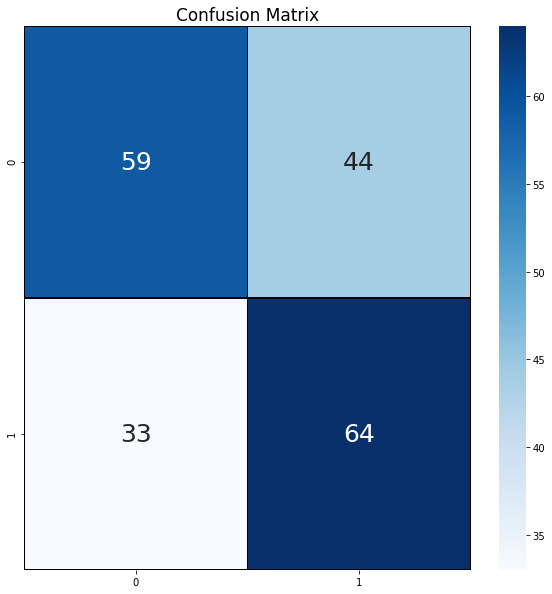

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print('Test Accuracy: ',nb.score(X_test, y_test))

y_pred = nb.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred) 

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws = {'size':25}, linewidths=0.5, fmt = '.0f', cmap='Blues', linecolor='black')
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### 3-g. Decision Tree
- A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditinal control statements.
- Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning

Test Accuracy: 0.63/Max Depth: 1
Test Accuracy: 0.725/Max Depth: 2
Test Accuracy: 0.805/Max Depth: 3
Test Accuracy: 0.845/Max Depth: 4
Test Accuracy: 0.865/Max Depth: 5
Test Accuracy: 0.85/Max Depth: 6
Test Accuracy: 0.86/Max Depth: 7
Test Accuracy: 0.845/Max Depth: 8
Test Accuracy: 0.825/Max Depth: 9


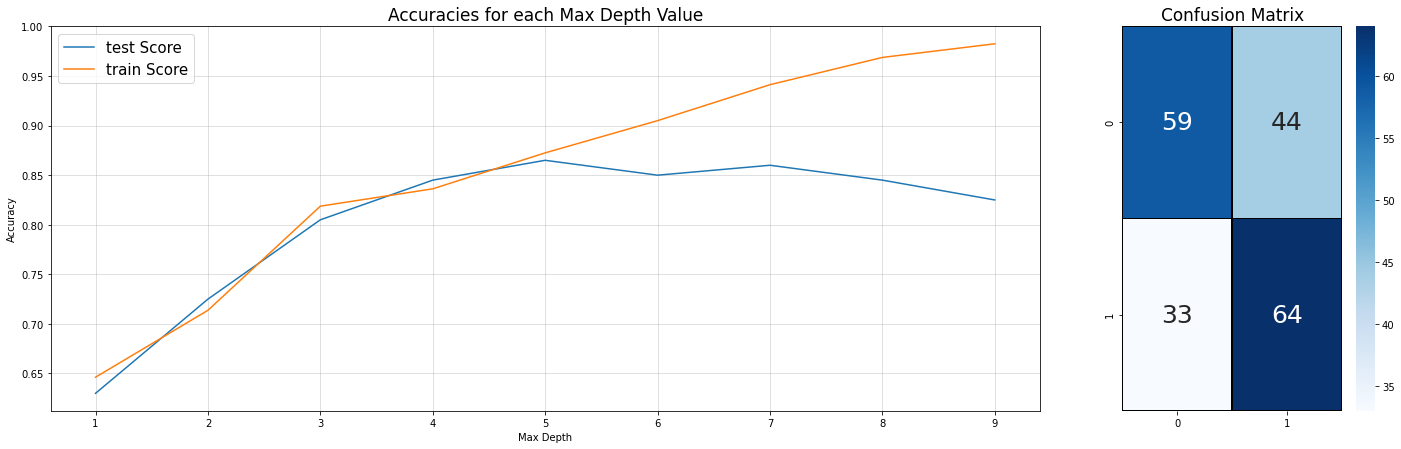

Best Accuracy: 0.865/Max Depth: 5


In [47]:
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)

#print('accuracy: ',dt.score(X_test,y_test)')

score_list_dt = []
train_list = []
for d in range(1,10):
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf = clf.fit(X_train, y_train)
    print('Test Accuracy: {}/Max Depth: {}'.format(clf.score(X_test, y_test),d))
    score_list_dt.append(clf.score(X_test, y_test))
    train_list.append(clf.score(X_train, y_train))
    
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(1,10),score_list_df, label = 'test Score')
ax1.plot(range(1,10),train_list, label = 'train Score')
ax1.legend(fontsize=15)
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.grid(True, alpha=0.5)
ax1.set_title('Accuracies for each Max Depth Value', fontsize=17)

dt_best = DecisionTreeClassifier(max_depth = 1 + score_list_dt.index(np.max(score_list_dt)))
dt_best = dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)
y_true = y_test

sns.heatmap(cm, annot=True, annot_kws={'size':25}, linewidths=0.5, fmt = '.0f', ax=ax2, cmap='Blues', linecolor = 'black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy: {}/Max Depth: {}'.format(np.max(score_list_dt),1+score_list_dt.index(np.max(score_list_dt))))

### 3-h. Random Forest
- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression)

Test Score : 0.855/Number of Estimators: 20
Test Score : 0.86/Number of Estimators: 40
Test Score : 0.84/Number of Estimators: 60
Test Score : 0.855/Number of Estimators: 80
Test Score : 0.865/Number of Estimators: 100
Test Score : 0.845/Number of Estimators: 120
Test Score : 0.855/Number of Estimators: 140


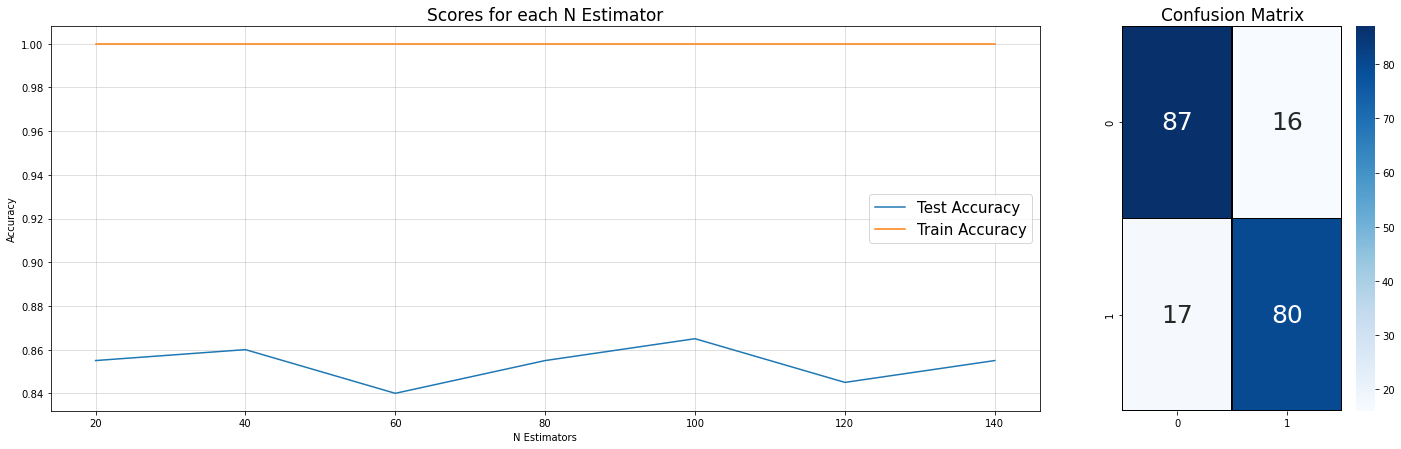

Best Accuracy: 0.865/Max Depth: 100


In [48]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=200)
#rf.fit(X_train, y_train)

#print('Accuracy: ',rf.score(X_test,y_test))

score_list_rf = []
train_list = []

for i in range(20, 160, 20):
    rf = RandomForestClassifier(n_estimators = i, random_state=42) # 100
    rf.fit(X_train, y_train)
    print('Test Score : {}/Number of Estimators: {}'.format(rf.score(X_test, y_test),i))
    score_list_rf.append(rf.score(X_test,y_test))
    train_list.append(rf.score(X_train,y_train))
    
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(20,160,20), score_list_rf, label='Test Accuracy')
ax1.plot(range(20,160,20), train_list, label='Train Accuracy')
ax1.legend(fontsize=15)
ax1.set_xlabel('N Estimators')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores for each N Estimator', fontsize=17)
ax1.grid(True, alpha=0.5)


rf_best = RandomForestClassifier(n_estimators = 20*(1+score_list_rf.index(np.max(score_list_rf))))
rf_best = rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws = {'size':25}, linewidths=0.5, fmt='.0f', ax=ax2, cmap='Blues', linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy: {}/Max Depth: {}'.format(np.max(score_list_rf), 20*(1 + score_list_rf.index(np.max(score_list_rf)))))

### 3-i. Perceptron
- In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

Test Score: 0.86/Alpha: 0.0001
Test Score: 0.86/Alpha: 0.0002
Test Score: 0.86/Alpha: 0.0003
Test Score: 0.86/Alpha: 0.0004
Test Score: 0.86/Alpha: 0.0005
Test Score: 0.86/Alpha: 0.0006
Test Score: 0.86/Alpha: 0.0007
Test Score: 0.86/Alpha: 0.0008
Test Score: 0.86/Alpha: 0.0009


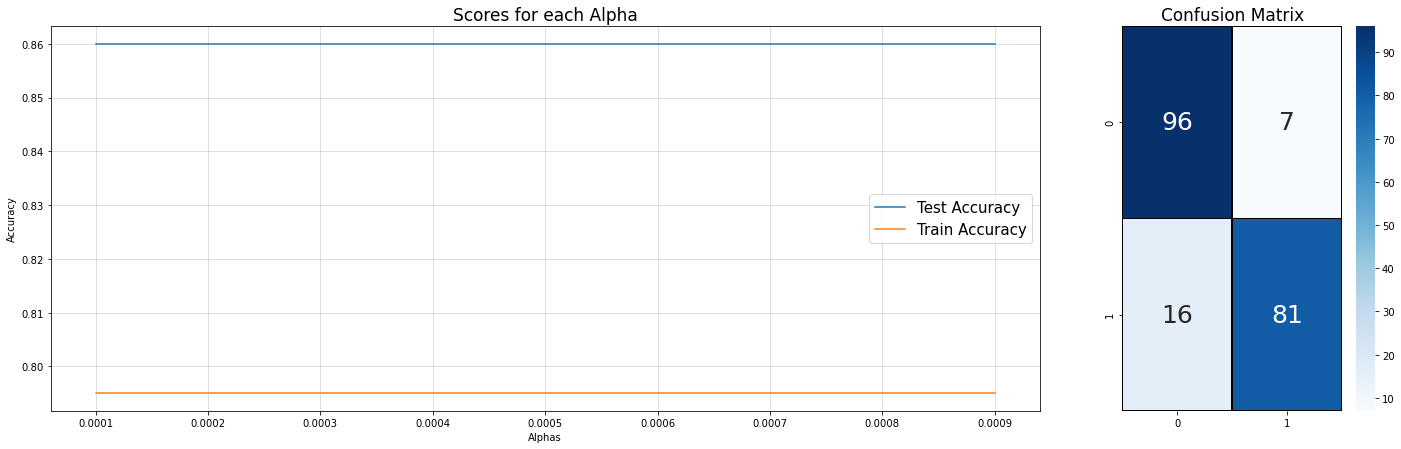

Best Accuracy: 0.86/Alpha: 0.0001


In [52]:
from sklearn.linear_model import Perceptron
#perceptron = Perceptron()
#perceptron.fit(X_train, y_train)

#print('Accuracy: ',perceptron.score(X_test, y_test))

score_list_per = []
train_list = []
for i in np.arange(0.0001, 0.001, 0.0001):
    perceptron = Perceptron(alpha = i, random_state=42)
    perceptron.fit(X_train, y_train)
    print('Test Score: {}/Alpha: {}'.format(perceptron.score(X_test, y_test),np.round(i,5)))
    score_list_per.append(perceptron.score(X_test, y_test))
    train_list.append(perceptron.score(X_train, y_train))
    
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(np.arange(0.0001, 0.001, 0.0001), score_list_per, label='Test Accuracy')
ax1.plot(np.arange(0.0001, 0.001, 0.0001), train_list, label='Train Accuracy')
ax1.legend(fontsize=15)
ax1.set_xlabel('Alphas')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores for each Alpha', fontsize=17)
ax1.grid(True, alpha=0.5)

per_best = Perceptron(alpha=0.0001*(1+score_list_per.index(np.max(score_list_per))))
per_best = per_best.fit(X_train, y_train)
y_pred = per_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws={'size':25}, linewidths=0.5, fmt = '.0f', ax=ax2, cmap='Blues', linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy: {}/Alpha: {}'.format(np.max(score_list_per),0.0001*(1+score_list_per.index(np.max(score_list_per)))))

### 3-j. Stochastic Gradient Descent (SGD)
- Stochastic gradient descent (often abbreviated SGC) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable of subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient(calculated from the entire data set) by an estimate thereof (caculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.
- while the basic idea behind stochastic approximation can be traced back to the Robbins-Monro algorithm of the 1950s, stochastic gradient descent has become an important optimization method in machine learning


Test Score: 0.82/Epsilon: 0.05
Test Score: 0.82/Epsilon: 0.07
Test Score: 0.82/Epsilon: 0.09
Test Score: 0.82/Epsilon: 0.11
Test Score: 0.82/Epsilon: 0.13
Test Score: 0.82/Epsilon: 0.15
Test Score: 0.82/Epsilon: 0.17
Test Score: 0.82/Epsilon: 0.19
Test Score: 0.82/Epsilon: 0.21
Test Score: 0.82/Epsilon: 0.23
Test Score: 0.82/Epsilon: 0.25
Test Score: 0.82/Epsilon: 0.27
Test Score: 0.82/Epsilon: 0.29


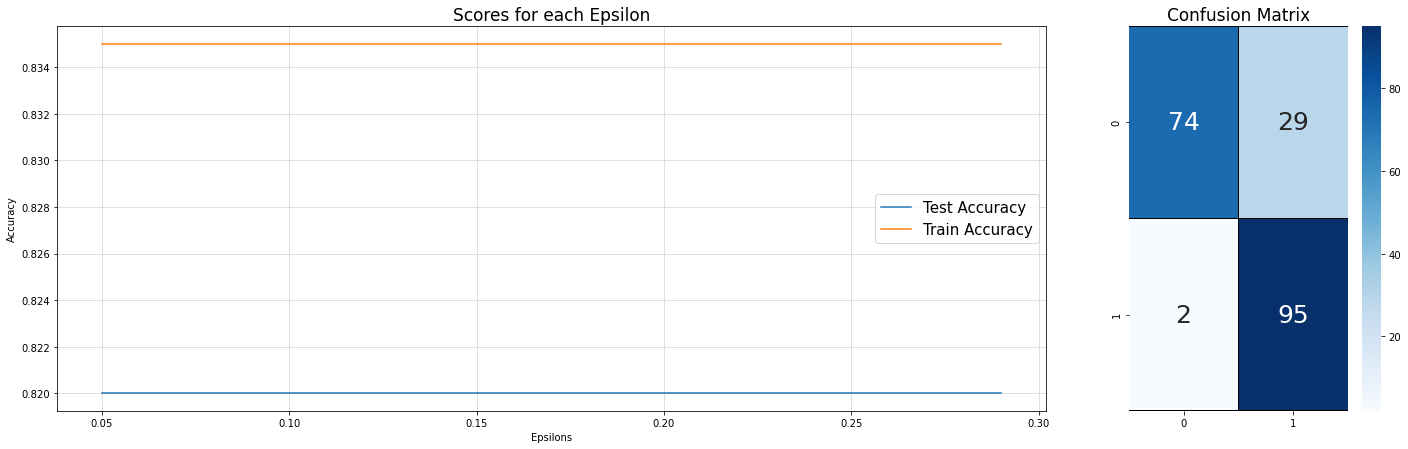

Best Accuracy: 0.82/Epsilon: 0.05


In [62]:
from sklearn.linear_model import SGDClassifier
#sgd = SGDClassifier()
#sgd.fit(X_train, y_train)

#print('Accuracy: ', sgd.score(X_test, y_test))

score_list_sgd = []
train_list = []
for i in np.arange(0.05, 0.3, 0.02):
    sgd = SGDClassifier(epsilon = i, random_state = 42)
    sgd.fit(X_train, y_train)
    print('Test Score: {}/Epsilon: {}'.format(sgd.score(X_test, y_test), np.round(i,4)))
    score_list_sgd.append(sgd.score(X_test, y_test))
    train_list.append(sgd.score(X_train, y_train))
    
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(np.arange(0.05, 0.3, 0.02),score_list_sgd,label = "Test Accuracy")
ax1.plot(np.arange(0.05, 0.3, 0.02),train_list,label = "Train Accuracy")
ax1.legend(fontsize=15)
ax1.set_xlabel('Epsilons')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores for each Epsilon', fontsize=17)
ax1.grid(True, alpha=0.5)

sgd_best = SGDClassifier(epsilon = 0.03 + 0.02*(1+score_list_sgd.index(np.max(score_list_sgd))))
sgd_best = sgd_best.fit(X_train, y_train)
y_pred = sgd_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws = {'size':25}, linewidths=0.5, fmt = '.0f', ax=ax2, cmap='Blues', linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy: {}/Epsilon: {}'.format(np.max(score_list_sgd), 0.03+0.02*(1+score_list_sgd.index(np.max(score_list_sgd)))))

### 3-k. Ridge Regression

Test Score : 0.915/Tol: 0.0005
Test Score : 0.915/Tol: 0.001
Test Score : 0.915/Tol: 0.0015
Test Score : 0.915/Tol: 0.002
Test Score : 0.915/Tol: 0.0025


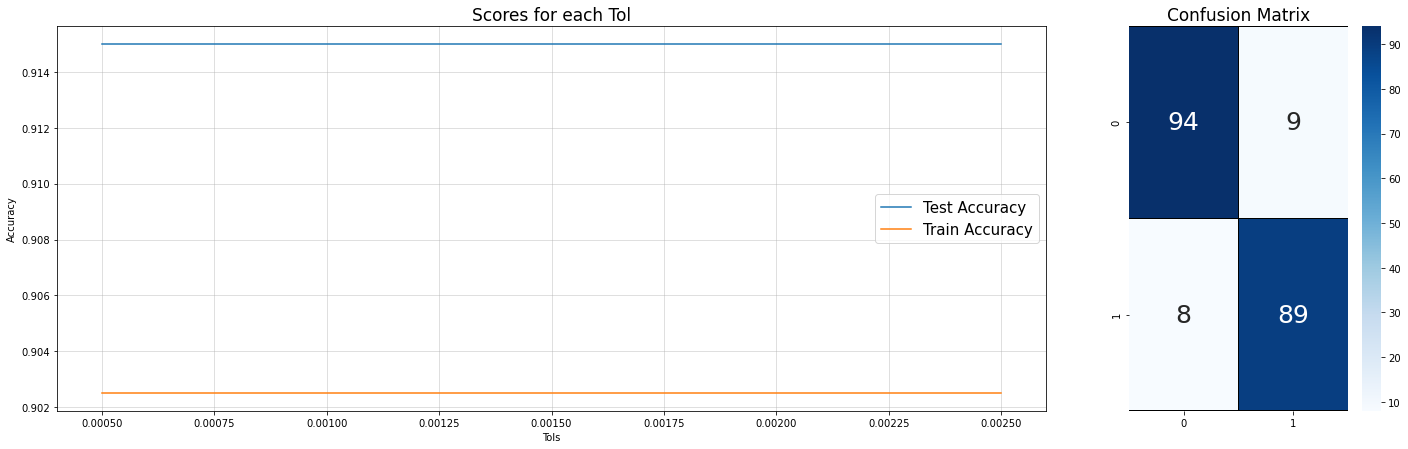

Best Accuracy: 0.915/Tol: 0.0005


In [65]:
from sklearn.linear_model import RidgeClassifier
#ridge = RidgeClassifier()
#ridge.fit(X_train, y_train)

#print('Accuracy: ',ridge.score(X_test, y_test))

score_list_ridge = []
train_list = []
for i in np.arange(0.0005, 0.003, 0.0005):
    ridge = RidgeClassifier(tol = i, random_state=42)
    ridge.fit(X_train,y_train)
    print('Test Score : {}/Tol: {}'.format(ridge.score(X_test, y_test), np.round(i,4)))
    score_list_ridge.append(ridge.score(X_test, y_test))
    train_list.append(ridge.score(X_train,y_train))
    
fig, ax = plt.subplots(1,2, figsize=(17,6))
gs = fig.add_gridspec(1,4)

grid = GridSpec(1,4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(np.arange(0.0005, 0.003, 0.0005), score_list_ridge, label='Test Accuracy')
ax1.plot(np.arange(0.0005, 0.003, 0.0005), train_list, label='Train Accuracy')
ax1.legend(fontsize=15)
ax1.set_xlabel('Tols')
ax1.set_ylabel('Accuracy')
ax1.set_title('Scores for each Tol', fontsize=17)
ax1.grid(True, alpha=0.5)

best_score = np.max(score_list_ridge)
best_tol = 0.0005*(1+score_list_ridge.index(best_score)) 
rid_best = RidgeClassifier(tol = best_tol)
rid_best = rid_best.fit(X_train, y_train)
y_pred = rid_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, annot_kws={'size':25}, linewidths=0.5, fmt='.0f', ax=ax2, cmap='Blues',linecolor='black')
plt.title('Confusion Matrix', fontsize=17)
plt.show()

print('Best Accuracy: {}/Tol: {}'.format(best_score, best_tol))

In [66]:
dict_models = {'Models':['Logistic Regression',
                         'KNN',
                         'SVC',
                         'GaussianNB',
                         'Decision Tree',
                         'Random Forest',
                         'Perceptron',
                         'Stocastic Gradient Descent',
                         'Ridge'
                        ],
               'Scores':[np.max(score_list_lr).round(3),
                         np.max(score_list_knn).round(3),
                         np.max(score_list_svm).round(3),
                         nb.score(X_test,y_test),
                         np.max(score_list_dt).round(3),
                         np.max(score_list_rf).round(3),
                         np.max(score_list_per).round(3),
                         np.max(score_list_sgd).round(3),
                         np.max(score_list_ridge).round(3)
                        ]}

df_scores_models = pd.DataFrame(data=dict_models)
df_scores_models = df_scores_models.sort_values(by=['Scores'])
df_scores_models.head(len(df_scores_models))

,Models,Scores
3,GaussianNB,0.615
7,Stocastic Gradient Descent,0.820
6,Perceptron,0.860
4,Decision Tree,0.865
5,Random Forest,0.865
2,SVC,0.895
0,Logistic Regression,0.910
1,KNN,0.910
8,Ridge,0.915


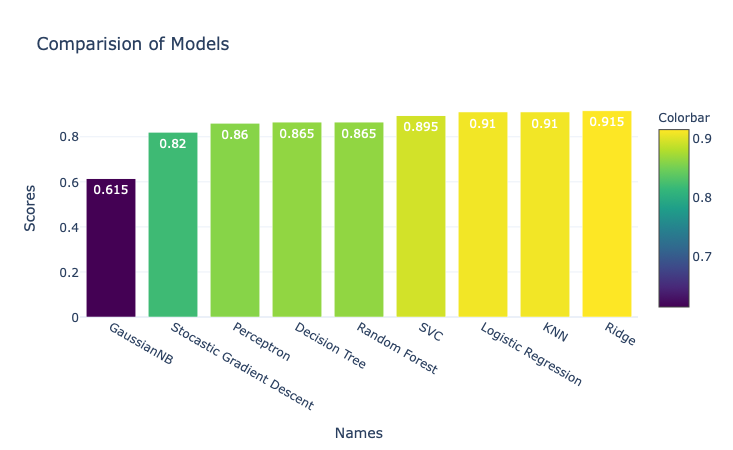

In [68]:
trace1 = go.Bar(
    x = df_scores_models['Models'],
    y = df_scores_models['Scores'],
    text = df_scores_models['Scores'],
    textposition = 'auto',
    marker = dict(color = df_scores_models['Scores'], colorbar=dict(
        title='Colorbar'
    ), colorscale='Viridis',)
)

data = [trace1]
layout = go.Layout(title='Comparision of Models', template = 'plotly_white')

fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(title_text = 'Names')
fig.update_yaxes(title_text = 'Scores')
fig.show()